<a href="https://colab.research.google.com/github/alracey/level4-project/blob/main/1D_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad


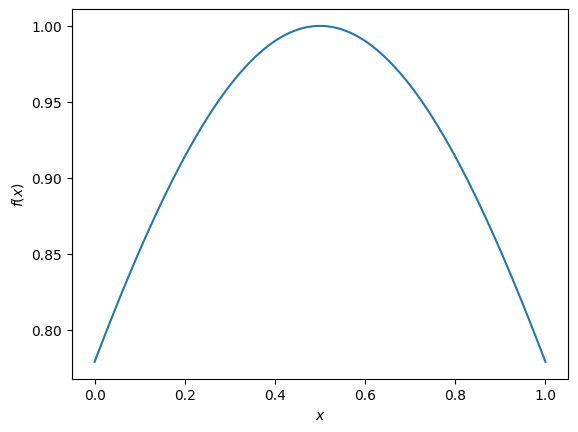

In [3]:
def f(x):
  return np.exp(-(x-0.5)**2)

xs = np.linspace(0, 1, 100)
f_evals = f(xs)
plt.plot(xs, f_evals)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()

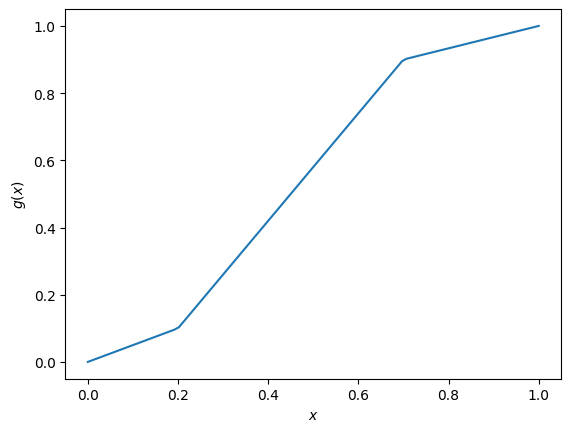

In [5]:
####initial guesses for x1,x2,y1,y2####
x_1, y_1 = 0.2, 0.1
x_2, y_2 = 0.7, 0.9

#define piecewise function manually
def g_1(x):
  return (y_1/x_1)*x

def g_2(x):
  return y_1 + ((y_2-y_1)/(x_2-x_1))*(x-x_1)

def g_3(x):
  return y_2 + ((1-y_2)/(1-x_2))*(x-x_2)

g = np.piecewise(xs, [xs < x_1, (xs >= x_1) & (xs < x_2), xs >= x_2], [g_1, g_2, g_3])

plt.plot(xs, g)
plt.xlabel('$x$')
plt.ylabel('$g(x)$')
plt.show()

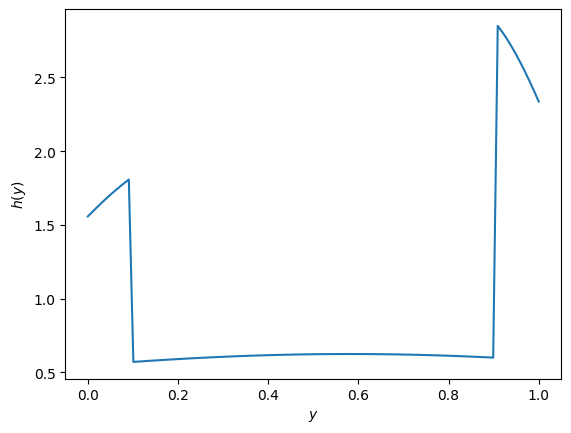

In [6]:
#define inverses of g manually

def g_1_inv(y):
  return (x_1/y_1)*y

def g_2_inv(y):
  return x_1 + ((x_2-x_1)/(y_2-y_1))*(y-y_1)

def g_3_inv(y):
  return x_2 + ((1-x_2)/(1-y_2))*(y-y_2)

#define the jacobians of the inverses (in 1 dimension these are just the derivative)
jac_1 = x_1/y_1
jac_2 = (x_2-x_1)/(y_2-y_1)
jac_3 = (1-x_2)/(1-y_2)

#define the transformed function h(y) = f(g_inv(y))
def h_1(y):
  return f(g_1_inv(y)) * jac_1

def h_2(y):
  return f(g_2_inv(y)) * jac_2

def h_3(y):
  return f(g_3_inv(y)) * jac_3

ys = np.linspace(0, 1, 100)

h = np.piecewise(ys,[ys < y_1, (ys >= y_1) & (ys < y_2), ys >= y_2], [h_1, h_2, h_3])

plt.plot(ys, h)
plt.xlabel('$y$')
plt.ylabel('$h(y)$')
plt.show()

In [11]:
#integration - check whether integral of f and h is the same
F = quad(f, 0, 1)
print(F)

H_1, H_2, H_3 = quad(h_1, 0, y_1), quad(h_2, y_1, y_2), quad(h_3, y_2, 1)
H, H_err = np.sum([H_1[0], H_2[0], H_3[0]]), np.sum([H_1[1], H_2[1], H_3[1]])
print(H, H_err)

(0.9225620128255849, 1.0242495882834934e-14)
0.9225620128255848 1.0242495882834932e-14


In [19]:
#Calculate the variances before optimising parameters

def variance(function, mean):
  integrand = lambda x: (function(x) - mean)**2
  return quad(integrand, 0, 1)  #will include error

#variance of original function
f_mean = np.mean(f_evals)
f_var = variance(f, f_mean)

#variance of transformed function
h_mean = np.mean(h)
h_1_var, h_2_var, h_3_var = variance(h_1, h_mean), variance(h_2, h_mean), variance(h_3, h_mean)
h_var, h_var_err = np.sum([h_1_var[0], h_2_var[0], h_3_var[0]]), np.sum([h_1_var[1], h_2_var[1], h_3_var[1]])

#def integrand_2(y):
  #return (h_1(y) - h_var)**2

#def integrand_3(y):
  #return (h_2(y) - h_var)**2

#def integrand_4(y):
  #return (h_3(y) - h_var)**2

print(np.var(f_evals))
print(f_var)
print(h_var, h_var_err)

0.004667025123124368
(0.004505828982124246, 5.002475080977671e-17)
2.1606911225272585 1.3209948960161205e-11


In [ ]:
#Optimisation

